In [553]:
import numpy as np

In [554]:
class Perceptron:
  def __init__(self,N,alpha=0.1):
    self.W=np.random.randn(N+1)/np.sqrt(N)
    self.alpha=alpha

  def step(self,x):
    return 1 if x>0 else 0

  def fit(self,X,y,epochs=10):
    X=np.c_[np.ones((X.shape[0])),X]

    for epoch in np.arange(0,epochs):
      for (x,target) in zip(X,y):
        p=self.step(np.dot(x,self.W))
        if p != target:
          error=p-target
          self.W+=-self.alpha*error*x
  def predict(self,X,add_bias=True):
    X=np.atleast_2d(X)
    if add_bias:
      X=np.c_[np.ones((X.shape[0])),X]

    return self.step(np.dot(X,self.W))


In [555]:
X= np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[0],[0],[1]])

In [556]:
X.shape[0]

4

In [557]:
X.shape[1]


2

In [558]:
model=Perceptron(X.shape[1],alpha=0.1)
model

In [559]:
model.fit(X,y,epochs=20)

In [560]:
for (x,target) in zip(X,y):
  predict=model.predict(x)
  print(f'X={x} , label={target[0]}, prediction={predict}')

X=[0 0] , label=0, prediction=0
X=[0 1] , label=0, prediction=0
X=[1 0] , label=0, prediction=0
X=[1 1] , label=1, prediction=1


In [561]:
model.W

array([-0.16941332,  0.11767074,  0.11594777])

In [562]:
w0,w1,w2=model.W

In [563]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [564]:
X[:,0]

array([0, 0, 1, 1])

In [565]:
x2_hat=-1*(X[:,0]*w1+w0)/w2

In [566]:
y

array([[0],
       [0],
       [0],
       [1]])

In [567]:
y.flatten()

array([0, 0, 0, 1])

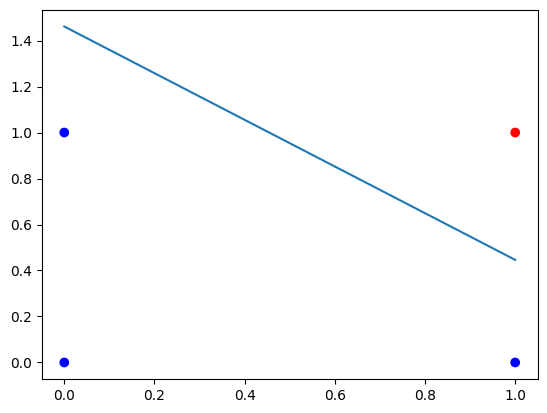

In [568]:
import matplotlib.pyplot as plt
colors=['blue','red']
y_colors=[colors[i] for i in y.flatten()]
plt.scatter(X[:,0],X[:,1],color=y_colors)
plt.plot(X[:,0],x2_hat)

# Linear Separable

In [569]:
from sklearn.neural_network import MLPClassifier

In [570]:
import pandas as pd
import numpy as np

prefix_url='https://graphemy.ir/datasets'
def get_file(name):
  file_name=name if '.csv' in name else f'{name}.csv'
  return f'{prefix_url}/{file_name}'

In [571]:
df=pd.read_csv(get_file("heart_failure_clinical_records_dataset"))
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [572]:
df['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [573]:
X=df.drop('DEATH_EVENT',axis=1).to_numpy()
y=df['DEATH_EVENT'].to_numpy()

X.shape,y.shape

((299, 12), (299,))

In [600]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [601]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [602]:
model1 = MLPClassifier(hidden_layer_sizes=  100 , max_iter = 200)

In [603]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [604]:
model1.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=100)

In [605]:
prediction=model1.predict(X_test)

In [606]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        40
           1       0.00      0.00      0.00        20

    accuracy                           0.67        60
   macro avg       0.33      0.50      0.40        60
weighted avg       0.44      0.67      0.53        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [607]:
model2 = MLPClassifier(hidden_layer_sizes=  150 , max_iter = 300)

In [608]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [609]:
model2.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=150, max_iter=300)

In [610]:
prediction=model2.predict(X_test)

In [611]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.32      0.95      0.48        20

    accuracy                           0.32        60
   macro avg       0.16      0.47      0.24        60
weighted avg       0.11      0.32      0.16        60



In [612]:
model3 = MLPClassifier(hidden_layer_sizes=  200 , max_iter = 350)

In [613]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [614]:
model3.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=200, max_iter=350)

In [615]:
prediction=model3.predict(X_test)

In [616]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.67      0.05      0.09        40
           1       0.33      0.95      0.49        20

    accuracy                           0.35        60
   macro avg       0.50      0.50      0.29        60
weighted avg       0.56      0.35      0.23        60



In [617]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [618]:
model_dt = DecisionTreeClassifier()
model_dt = DecisionTreeClassifier(criterion = "entropy" , max_depth = None , random_state = 42)
model_dt.fit(X_train , y_train)
y_pred= model_dt.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        40
           1       0.71      0.60      0.65        20

    accuracy                           0.78        60
   macro avg       0.76      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



In [619]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [620]:
model_lr1 = LogisticRegression(max_iter = 200)
model_lr1.fit(X_train_scaled , y_train)

LogisticRegression(max_iter=200)

In [621]:
y_pred = model_lr1.predict(X_test_scaled)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.93      0.70      0.80        20

    accuracy                           0.88        60
   macro avg       0.90      0.84      0.86        60
weighted avg       0.89      0.88      0.88        60



In [622]:
model_lr2 = LogisticRegression(max_iter = 300)
model_lr2.fit(X_train_scaled , y_train)

LogisticRegression(max_iter=300)

In [623]:
y_pred = model_lr2.predict(X_test_scaled)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.93      0.70      0.80        20

    accuracy                           0.88        60
   macro avg       0.90      0.84      0.86        60
weighted avg       0.89      0.88      0.88        60



In [624]:
model_lr3 = LogisticRegression(max_iter = 350)
model_lr3.fit(X_train_scaled , y_train)

LogisticRegression(max_iter=350)

In [625]:
y_pred = model_lr2.predict(X_test_scaled)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.93      0.70      0.80        20

    accuracy                           0.88        60
   macro avg       0.90      0.84      0.86        60
weighted avg       0.89      0.88      0.88        60

